In [1]:
import os
import shutil

import matplotlib.pyplot as plt

from dummy_baskets import generate_dummy_baskets, run_index_basket_upload_test
from weave.index.index_pandas import IndexPandas
from weave.index.index_sqlite import IndexSQLite
from weave.index.index_sql import IndexSQL


**Pandas Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type)**

In these tests we will be analyzing the performance differences when more files are uploaded, files are larger, and the number of basket types are increased. This will done using the pandas index.

In [2]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
pandas_time1 = run_index_basket_upload_test(basket_list=baskets, index=IndexPandas, pantry_path="dummy_pantry")
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type: {pandas_time1} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

Time taken to upload 1000 baskets: 158.73455715179443 seconds.
1000 baskets, 1 upload file, 1 mb size files, 1 basket type: 158.73455715179443 seconds


In [3]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=10, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
pandas_time2 = run_index_basket_upload_test(basket_list=baskets, index=IndexPandas, pantry_path="dummy_pantry")
print(f"1000 baskets, 10 upload files, 1 mb size files, 1 basket type: {pandas_time2} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

Time taken to upload 1000 baskets: 182.34477710723877 seconds.
1000 baskets, 10 upload files, 1 mb size files, 1 basket type: 182.34477710723877 seconds


Performance difference between uploading 10 files in each basket compared to 1 file in each basket

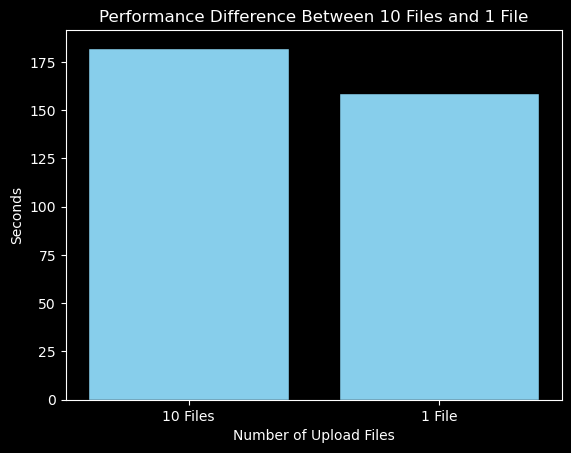

In [4]:
categories = ["10 Files", "1 File"]
values = [pandas_time2, pandas_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Number of Upload Files')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 10 Files and 1 File')

plt.show()


As you can see there is almost no difference in performance when we upload multiple files in each basket compared to one file

In [5]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=2, file_path="dummy_txt", num_basket_types=1)
pandas_time3 = run_index_basket_upload_test(basket_list=baskets, index=IndexPandas, pantry_path="dummy_pantry")
print(f"1000 baskets, 1 upload file, 2 mb size files, 1 basket type: {pandas_time3} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

Time taken to upload 1000 baskets: 159.32702827453613 seconds.
1000 baskets, 1 upload file, 2 mb size files, 1 basket type: 159.32702827453613 seconds


Performance difference between uploading a 2 mb file in each basket compared to a 1 mb file in each basket

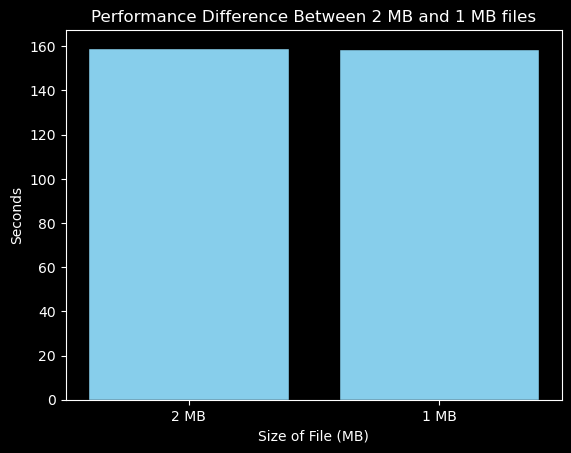

In [6]:
categories = ["2 MB", "1 MB"]
values = [pandas_time3, pandas_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Size of File (MB)')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 2 MB and 1 MB files')

plt.show()

Once again, there is almost no performance difference between uploading a 2 MB file and a 1 MB file in each basket

In [7]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=10)
pandas_time4 = run_index_basket_upload_test(basket_list=baskets, index=IndexPandas, pantry_path="dummy_pantry")
print(f"1000 baskets, 1 upload file, 1 mb size files, 10 basket types: {pandas_time4} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

Time taken to upload 1000 baskets: 158.7684953212738 seconds.
1000 baskets, 1 upload file, 1 mb size files, 10 basket types: 158.7684953212738 seconds


Performance difference between uploading 10 basket types versus 1 basket types

Text(0.5, 1.0, 'Performance Difference Between 10 and 1 Basket Types')

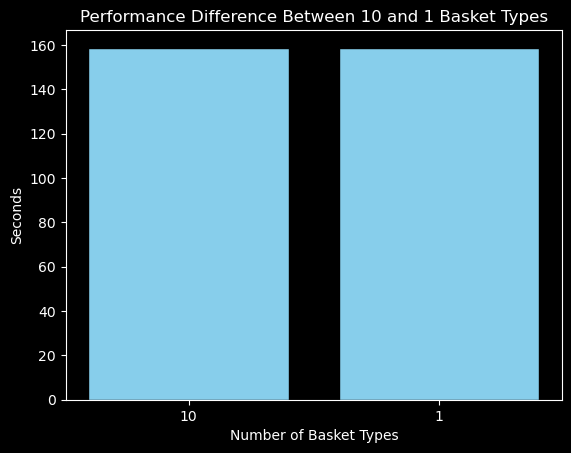

In [8]:
categories = ["10", "1"]
values = [pandas_time4, pandas_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Number of Basket Types')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 10 and 1 Basket Types')

Once again, there seems to be no performance difference between number of basket types

**SQLite Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type)**

In this test we will test the performance of uploading baskets using the same parameters as the first index pandas test. We will be using the SQLite index backend for these tests.

In [9]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
sqlite_time1 = run_index_basket_upload_test(basket_list=baskets, index=IndexSQLite, pantry_path="dummy_pantry")
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type: {sqlite_time1} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")
os.remove("dummy_pantry.db")


Time taken to upload 1000 baskets: 40.618104696273804 seconds.
1000 baskets, 1 upload file, 1 mb size files, 1 basket type: 40.618104696273804 seconds


Performance difference between the Pandas Index and the SQLite index

Text(0.5, 1.0, 'Performance Difference Between Pandas and SQLite Indexes')

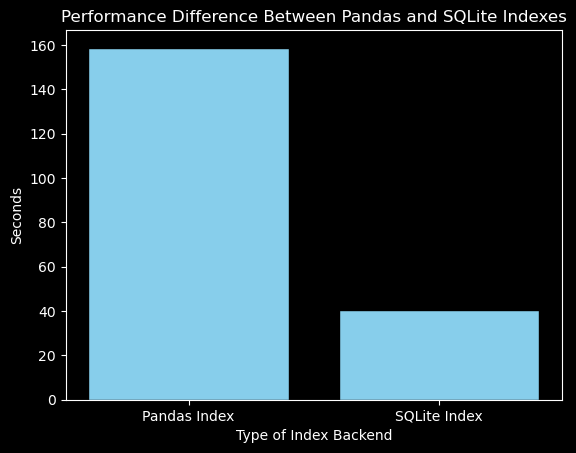

In [10]:
categories = ["Pandas Index", "SQLite Index"]
values = [pandas_time1, sqlite_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Type of Index Backend')
plt.ylabel('Seconds')
plt.title('Performance Difference Between Pandas and SQLite Indexes')

From the graph we can see there is a huge performance difference between the pandas and sqlite indexes

**SQL Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type)**

In this test we will test the performance of uploading baskets using the same parameters as the first index pandas test. We will be using the SQLite index backend for these tests.

Please make sure to connect your SQL server and the proper environment variables are in place to run these tests. 

In [11]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
sql_time2 = run_index_basket_upload_test(basket_list=baskets, index=IndexSQL, pantry_path="dummy_pantry")
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type: {sql_time2} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")
os.path.exists("dummy_pantry.db") and os.remove("dummy_pantry.db")

Time taken to upload 1000 baskets: 22.15164828300476 seconds.
1000 baskets, 1 upload file, 1 mb size files, 1 basket type: 22.15164828300476 seconds


False

Performance difference between the Pandas Index, the SQLite Index and the SQL Index.

Text(0.5, 1.0, 'Performance Difference Between Pandas, SQLite and SQL Indexes')

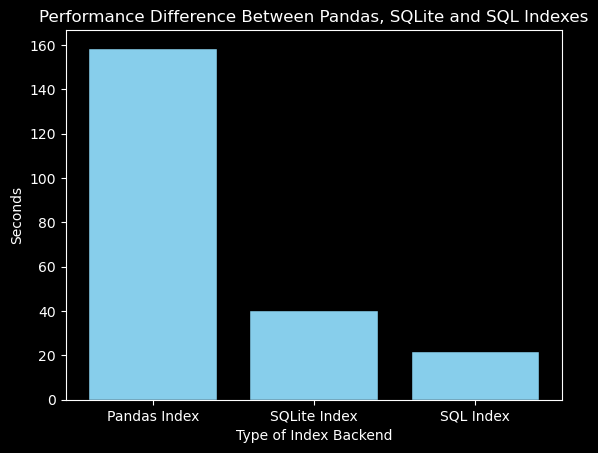

In [12]:
categories = ["Pandas Index", "SQLite Index", "SQL Index"]
values = [pandas_time1, sqlite_time1, sql_time2]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Type of Index Backend')
plt.ylabel('Seconds')
plt.title('Performance Difference Between Pandas, SQLite and SQL Indexes')

Looking at the graph, we can see that the difference between the Pandas Index and the other indexes is quite large. While, the difference between the SQLite Index and the SQL index is a bit smaller. 